In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import xarray as xr
import cmocean.cm as cmo 
import gsw
from mpl_toolkits.axes_grid1 import make_axes_locatable
from Useful import *

# Thule warm LADDIE

## Data

In [2]:
path ='../../../automated_testing/integrated_tests/idealised/Thule/Thule_LAD/results_5km_iceocean1r/'
pathplus ='../../../automated_testing/integrated_tests/idealised/MISMIPplus/results_5km_iceocean1r/'


In [3]:
Lad = xr.open_dataset(path + 'main_output_ANT_00001.nc')
MIS = xr.open_dataset(pathplus + 'main_output_ANT_00001.nc')

In [4]:
Va  = Lad['V']
V = Va.T

Tria = Lad['Tri']-1  
Tri = Tria.T

triang = tri.Triangulation(V[:, 0], V[:, 1], Tri)


Va_  = MIS['V']
V_ = Va_.T

Tria_ = MIS['Tri']-1  
Tri_ = Tria_.T

triang_ = tri.Triangulation(V_[:, 0], V_[:, 1], Tri_)

In [5]:
Lad

<xarray.Dataset> Size: 87MB
Dimensions:                     (two: 2, vi: 12346, ci: 32, three: 3,
                                 ti: 24428, ei: 36773, four: 4, vori: 24694,
                                 bin: 11, time: 11, zeta: 12, month: 12,
                                 depth: 16)
Coordinates:
  * time                        (time) float64 88B 0.0 1.0 2.0 ... 8.0 9.0 10.0
  * zeta                        (zeta) float64 96B 0.0 0.09091 ... 0.9091 1.0
  * month                       (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * depth                       (depth) float64 128B 0.0 100.0 ... 1.5e+03
Dimensions without coordinates: two, vi, ci, three, ti, ei, four, vori, bin
Data variables: (12/79)
    xmin                        float64 8B ...
    xmax                        float64 8B ...
    ymin                        float64 8B ...
    ymax                        float64 8B ...
    tol_dist                    float64 8B ...
    lambda_M                    float64 8B ...
    ...                          ...
    basal_shear_stress          (time, vi) float64 1MB ...
    S_ocean                     (depth, vi) float64 2MB ...
    T_ocean                     (depth, vi) float64 2MB ...
    T_freezing_point            (time, vi) float64 1MB ...
    melt                        (time, vi) float64 1MB ...
    Hib                         (time, vi) float64 1MB ...
Attributes:
    git commit hash:  98744553292abd84bc3be716d39f755c25813e28 (with uncommit...

In [50]:
Hi_l = Lad['Hi']
Hib_l = Lad['Hib']
Hs_l = Lad['Hs']
Hb_l = Lad['Hb']
BMB_l = Lad['BMB']
EM = Lad['entr_dmin']
E = Lad['entr']

In [40]:
mask_gr = Lad['mask_grounded_ice']

In [ ]:
H_lad = Lad['H_lad']
U_lad = Lad['U_lad']
V_lad = Lad['V_lad']
T_lad = Lad['T_lad']
S_lad = Lad['S_lad']

In [ ]:
S_MIS = MIS['S_lad']

In [ ]:
ds_trans = xr.open_dataset(path + 'transect_CapronaA.nc')
ds_trans1 = xr.open_dataset(path + 'transect_HalbraneA.nc')

In [ ]:
Hb_t = ds_trans['Hb']
Hib_t = ds_trans['Hib']
Hs_t = ds_trans['Hs']
Hi_t = ds_trans['Hi']

Hb_t1 = ds_trans1['Hb']
Hib_t1 = ds_trans1['Hib']
Hs_t1 = ds_trans1['Hs']
Hi_t1 = ds_trans1['Hi']

In [10]:
Lad_g = xr.open_dataset(path + 'main_output_ANT_grid.nc')

## Transects 

In [11]:
colorbar_kwargs = {
    'aspect': 7,      
    'pad': 0.02,      
}

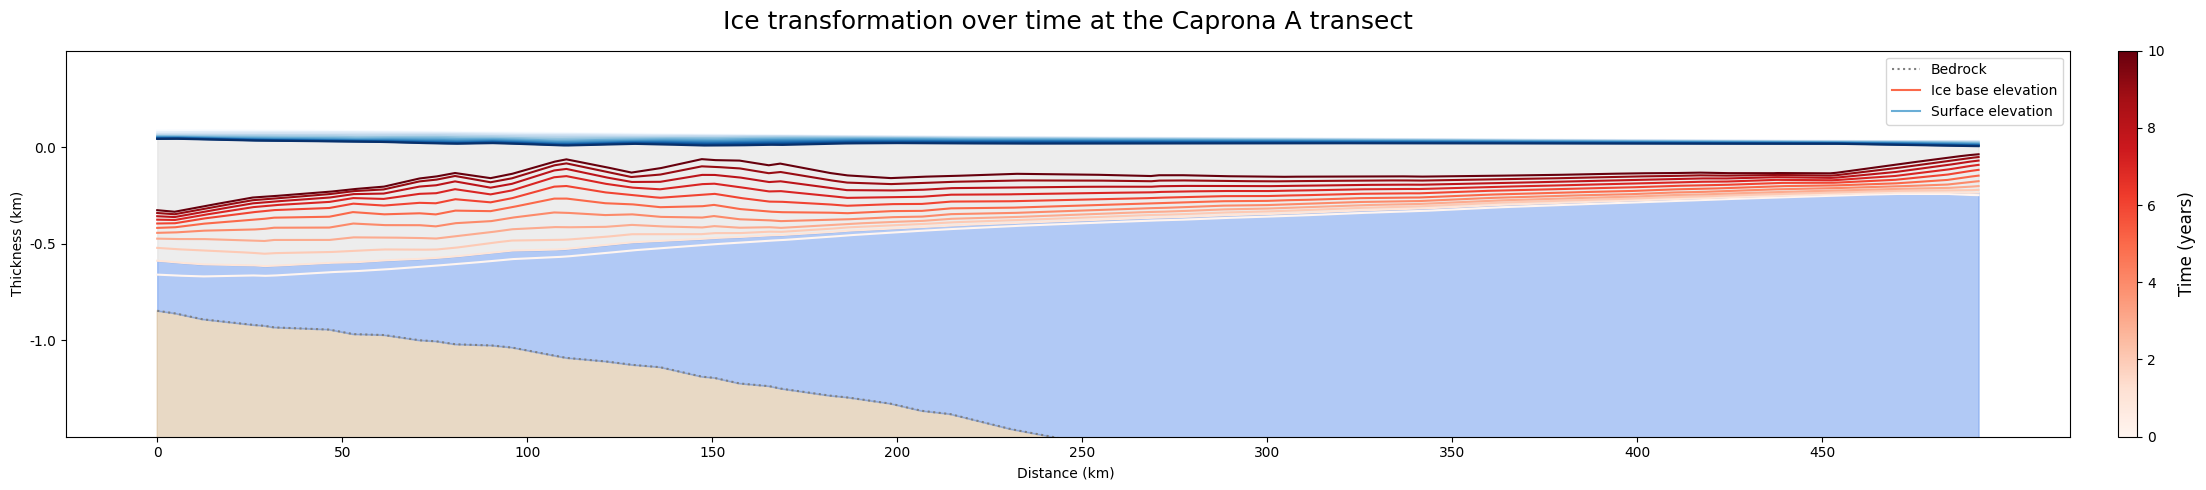

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [12]:
fig, ax = plt.subplots(figsize=(25, 5))

plt.title(f'Ice transformation over time at the Caprona A transect', x=0.5, pad=10, fontsize=18, y=1.02)

cmap1 = plt.get_cmap('Blues')                                                                       # color for the surface of the ice
cmap2 = plt.get_cmap('Reds')                                                                        # color for the base of the ice

norm = plt.Normalize(0, Hib_t.shape[0] - 1)                                                           # for the colors 

for i in range(Hib_t.shape[0]):
    color1 = cmap1(norm(i))
    color2 = cmap2(norm(i))
    ax.plot(Hib_t[i], color=color2)                                                                  # Add the base of the ice 
    ax.plot(Hs_t[i], color=color1)                                                                   # Add the surface of the ice 
ax.plot(Hb_t[0],  color='grey', label='Bedrock',linestyle=':')                                       # Add the bedrock that doesn't change over time

ax.plot([], [], color=cmap2(norm(5)), label='Ice base elevation')                                  # legend for the middle color  for blue and red 
ax.plot([], [], color=cmap1(norm(5)), label='Surface elevation') 

ax.fill_between(range(len(Hb_t[1])), Hib_t[1], Hs_t[1], color='gainsboro', alpha=0.5)                    # Fill in color for ice
ax.fill_between(range(len(Hb_t[1])), -4200*np.ones(len(Hib_t[1])), Hb_t[1], color='tan', alpha=0.5)    # Fill in color for rock
ax.fill_between(range(len(Hb_t[1])), Hb_t[1], Hib_t[1], color='cornflowerblue', alpha=0.5)             # Fill in color for ocean

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='vertical', pad=0.02, aspect=20)  
cbar2.set_label('Time (years)', fontsize=12, labelpad=10)
cbar2.ax.tick_params(labelsize=10)


ax.set_ylim(-1500,500)
ax.set_xlabel('Distance (km) ')
ax.set_ylabel('Thickness (km)')
ax.set_yticks(np.arange(-1000, 101, 500))
ax.set_yticklabels(np.arange(-1000, 101, 500) / 1000)
ax.set_xticks(np.arange(0, len(Hb_t[1]), 500))
ax.set_xticklabels(np.arange(0, len(Hb_t[1]) // 10, 50))

ax.legend()

plt.tight_layout()

plt.show()
plt.close



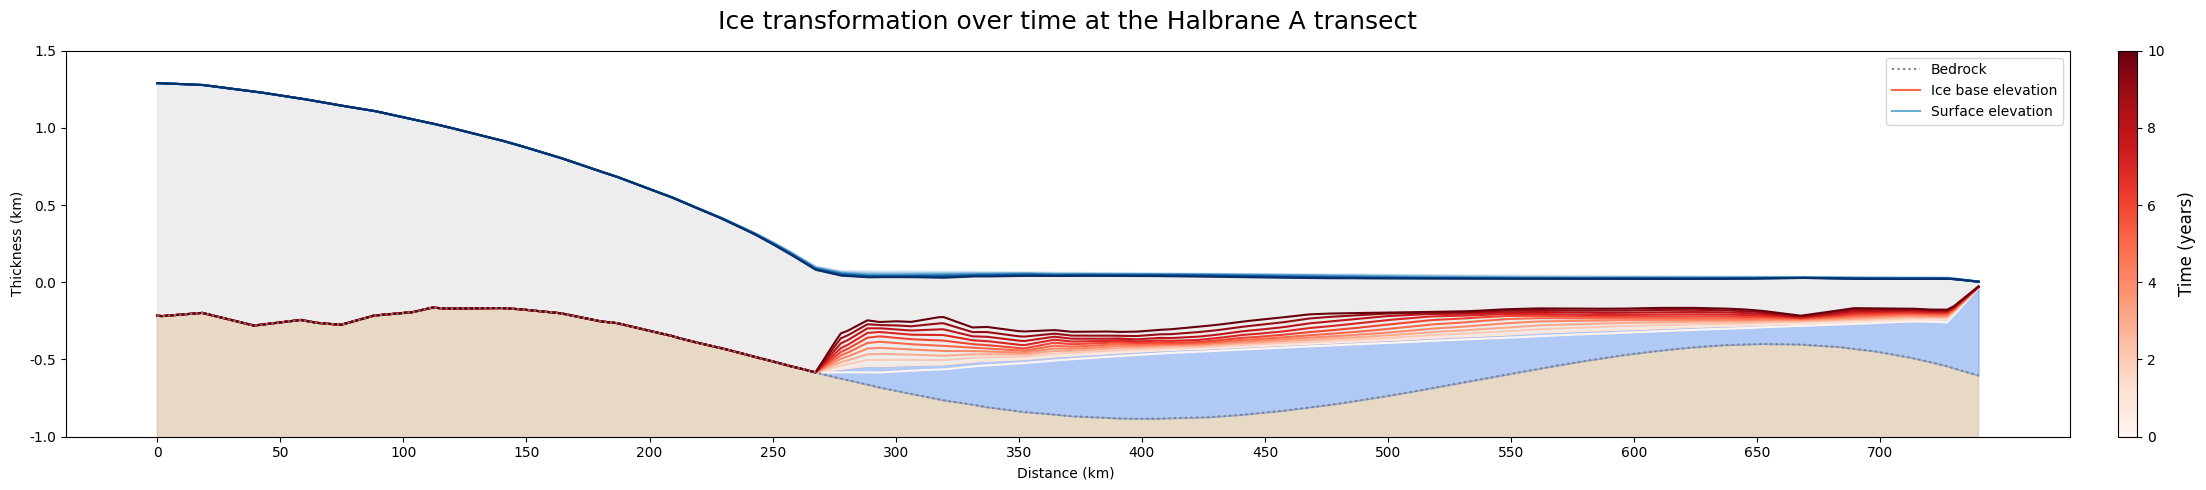

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [13]:

fig, ax = plt.subplots(figsize=(25, 5))

plt.title(f'Ice transformation over time at the Halbrane A transect', x=0.5, pad=10, fontsize=18, y=1.02)

cmap1 = plt.get_cmap('Blues')                                                                          # color for the surface of the ice
cmap2 = plt.get_cmap('Reds')                                                                           # color for the base of the ice

norm = plt.Normalize(0, Hib_t1.shape[0] - 1)                                                           # for the colors 

for i in range(Hib_t1.shape[0]):
    color1 = cmap1(norm(i))
    color2 = cmap2(norm(i))
    ax.plot(Hib_t1[i], color=color2)                                                                  # Add the base of the ice 
    ax.plot(Hs_t1[i], color=color1)                                                                   # Add the surface of the ice 
ax.plot(Hb_t1[0],  color='grey', label='Bedrock',linestyle=':')                                       # Add the bedrock that doesn't change over time

ax.plot([], [], color=cmap2(norm(5)), label='Ice base elevation')                                  # legend for the middle color  for blue and red 
ax.plot([], [], color=cmap1(norm(5)), label='Surface elevation') 

ax.fill_between(range(len(Hb_t1[1])), Hib_t1[1], Hs_t1[1], color='gainsboro', alpha=0.5)                    # Fill in color for ice
ax.fill_between(range(len(Hb_t1[1])), -4200*np.ones(len(Hib_t1[1])), Hb_t1[1], color='tan', alpha=0.5)    # Fill in color for rock
ax.fill_between(range(len(Hb_t1[1])), Hb_t1[1], Hib_t1[1], color='cornflowerblue', alpha=0.5)             # Fill in color for ocean

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='vertical', pad=0.02, aspect=20)  
cbar2.set_label('Time (years)', fontsize=12, labelpad=10)
cbar2.ax.tick_params(labelsize=10)

ax.set_ylim(-1000,1500)
ax.set_xlabel('Distance (km) ')
ax.set_ylabel('Thickness (km)')
ax.set_xticks(np.arange(0, len(Hb_t1[1]), 500))
ax.set_xticklabels(np.arange(0, len(Hb_t1[1]) // 10, 50))
ax.set_yticks(np.arange(-1000, 1501, 500))
ax.set_yticklabels(np.arange(-1000, 1501, 500) / 1000)

ax.legend()

plt.tight_layout()

plt.show()
plt.close



## View from top 

### Year 0

In [14]:
u = 0 

#### Mask 

In [18]:
distances = np.sqrt(V[:, 0]**2 + V[:, 1]**2)
radius = 750000
mask_ocean = distances <= radius
mask_SL = Hb_l[u] < 0
p = 0.01
mask_floating = (Hs_l[u] - Hi_l[u] - Hb_l[u] <= p)
mask_rock= ~mask_floating

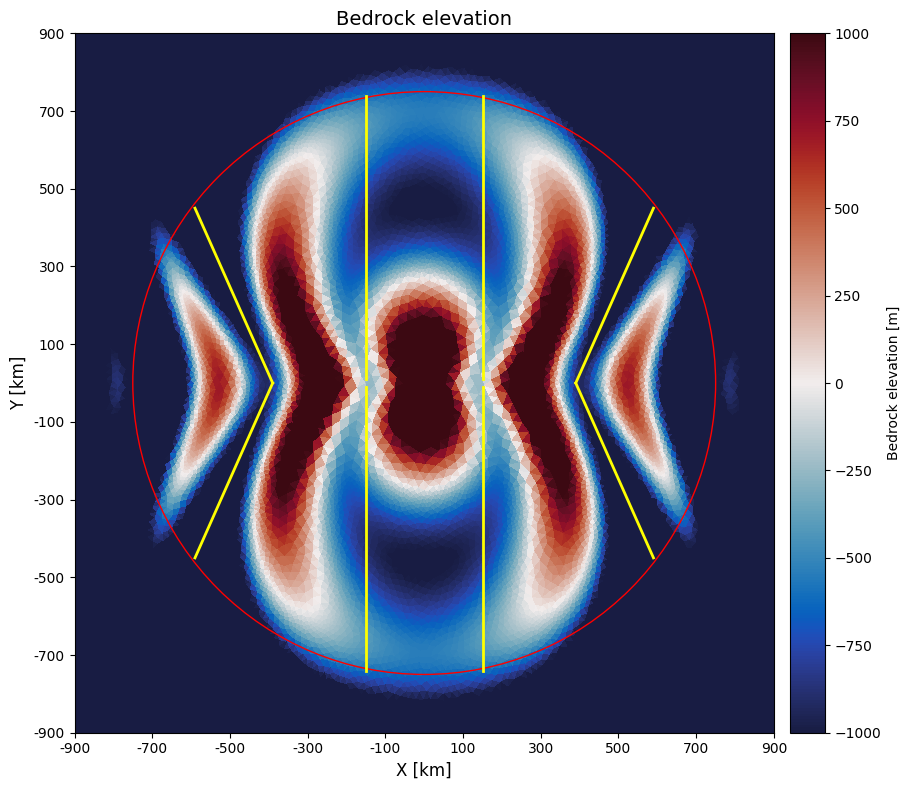

In [20]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

c0 = ax.tripcolor(triang, Hb_l[u], cmap=cmo.balance, vmin=-1000, vmax=1000)
fig.colorbar(c0, ax=ax, label="Bedrock elevation [m]", **colorbar_kwargs)
ax.set_title('Bedrock elevation', fontsize=14)
circle = plt.Circle((0, 0), 750000, color='red', fill=False, linestyle='-', linewidth=1)
ax.add_artist(circle)
ax.set_aspect('equal')
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)

ax.plot([150000, 150000], [10000, 740000], color='yellow', linestyle='-', linewidth=2)
ax.plot([150000, 150000], [-10000, -740000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-150000, -150000], [10000, 740000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-150000, -150000], [-10000, -740000], color='yellow', linestyle='-', linewidth=2)


ax.plot([390000, 590000], [0, 450000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-390000, -590000], [0, 450000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-390000,- 590000], [0, -450000], color='yellow', linestyle='-', linewidth=2)
ax.plot([390000, 590000], [0, -450000], color='yellow', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()

#### Properties

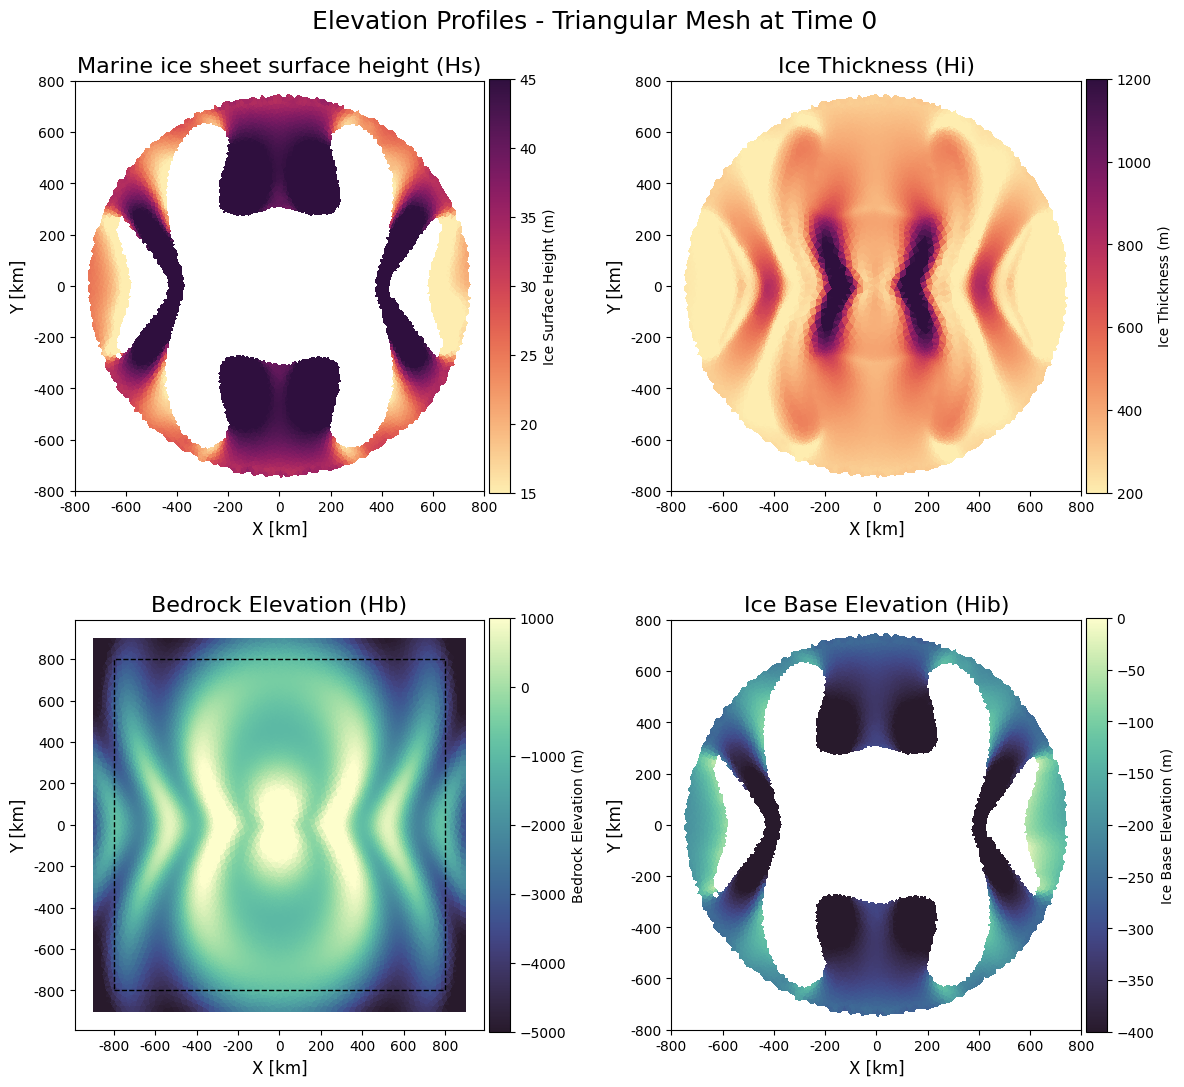

In [24]:
n = 800000

colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.8, 
}

##############################################################################################################################

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f'Elevation Profiles - Triangular Mesh at Time {u}', fontsize=18, x=0.5, y=0.92)


c0 = ax[0, 0].tripcolor(triang, Hs_l[u].where(mask_ocean & mask_rock ), cmap=cmo.matter, vmin = 15 , vmax = 45)
fig.colorbar(c0, ax=ax[0, 0], label="Ice Surface Height (m)", **colorbar_kwargs)
ax[0, 0].set_title('Marine ice sheet surface height (Hs)', fontsize=14)
#cont0 = ax[0, 0].tricontour(triang, Hs_l[u], levels=[0, 500, 1000, 1500], colors='k', linewidths=1)
#ax[0, 0].clabel(cont0, inline=True, fontsize=8)
ax[0, 0].set_xlim(-n,n)
ax[0, 0].set_ylim(-n,n)


c1 = ax[0, 1].tripcolor(triang, Hi_l[u].where(mask_ocean), cmap=cmo.matter, vmin = 200, vmax=1200)
fig.colorbar(c1, ax=ax[0, 1], label="Ice Thickness (m)", **colorbar_kwargs)
ax[0, 1].set_title('Ice Thickness (Hi)', fontsize=14)
#cont1 = ax[0, 1].tricontour(triang, Hi_l[u], levels=[0, 500, 1000, 1500], colors='k', linewidths=1)
#ax[0, 1].clabel(cont1, inline=True, fontsize=8)
ax[0, 1].set_xlim(-n,n)
ax[0, 1].set_ylim(-n,n)


c2 = ax[1, 0].tripcolor(triang, Hb_l[u], cmap=cmo.deep_r, vmin=-5000, vmax=1000)
fig.colorbar(c2, ax=ax[1, 0], label="Bedrock Elevation (m)", **colorbar_kwargs)
ax[1, 0].set_title('Bedrock Elevation (Hb)', fontsize=14)
#cont2 = ax[1, 0].tricontour(triang, Hb_l[u], levels=[-700, -500, -250, 0, 250], colors='k', linewidths=1)
#ax[1, 0].clabel(cont2, inline=True, fontsize=8)
box_x = [-800000, 800000, 800000, -800000, -800000]
box_y = [-800000, -800000, 800000, 800000, -800000]
ax[1, 0].plot(box_x, box_y, color='black', linestyle='--', linewidth=1)


c3 = ax[1, 1].tripcolor(triang, Hib_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep_r , vmin = -400, vmax=0)
fig.colorbar(c3, ax=ax[1, 1], label="Ice Base Elevation (m)", **colorbar_kwargs)
ax[1, 1].set_title('Ice Base Elevation (Hib)', fontsize=14)
#cont3 = ax[1, 1].tricontour(triang, Hs_l[u] - Hi_l[u], levels=[-600, -300, 0, 300], colors='k', linewidths=1)
#ax[1, 1].clabel(cont3, inline=True, fontsize=8)
ax[1, 1].set_xlim(-n,n)
ax[1, 1].set_ylim(-n,n)
 

for i in range(2):
    for j in range(2):
        ax[i, j].set_aspect('equal')
        ax[i, j].title.set_fontsize(16)
        ax[i, j].set_xlabel('X [km]', fontsize=12)
        ax[i, j].set_ylabel('Y [km]', fontsize=12)
        ax[i, j].set_xticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_yticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/4147591235.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/4147591235.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


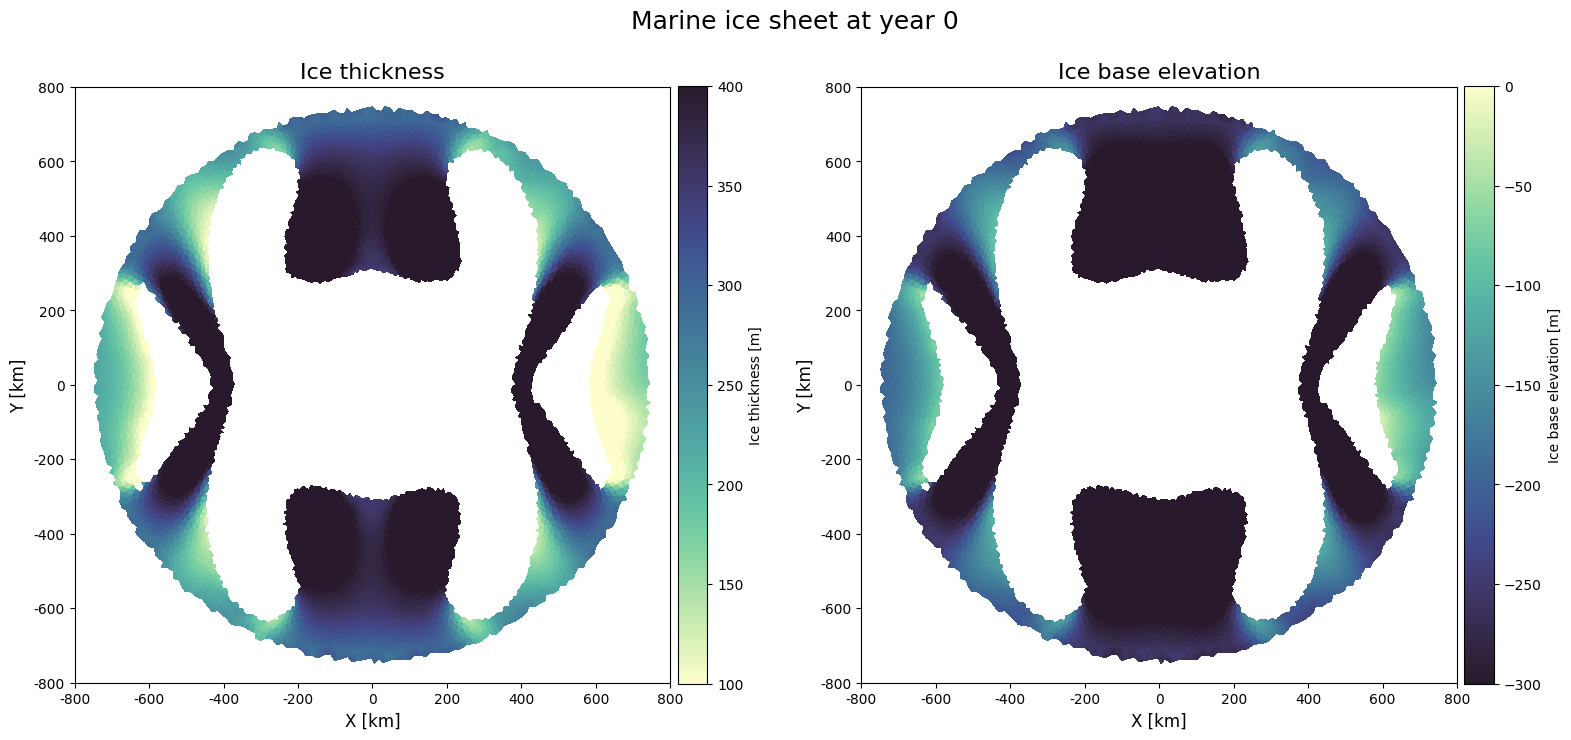

In [25]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.865, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'Marine ice sheet at year {u}', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, Hi_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep, vmin = 100, vmax = 400)
fig.colorbar(c0, ax=ax[0], label="Ice thickness [m]", **colorbar_kwargs)
ax[0].set_title('Ice thickness', fontsize=14)
#cont1 = ax[0].tricontour(triang, S_lad[u], levels=[30,31,32,33,34], colors='r', linewidths=1)
#ax[0].clabel(cont1, inline=True, fontsize=8)

c1 = ax[1].tripcolor(triang, Hs_l[u].where(mask_ocean & mask_rock) - Hi_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep_r, vmin = -300, vmax = 0)
fig.colorbar(c1, ax=ax[1], label="Ice base elevation [m]", **colorbar_kwargs)
ax[1].set_title('Ice base elevation', fontsize=14)
#cont2 = ax[1].tricontour(triang, T_lad[u], levels=[-1.5,-1,-0.5], colors='k', linewidths=1)
#ax[1].clabel(cont2, inline=True, fontsize=8)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/2550948274.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/2550948274.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


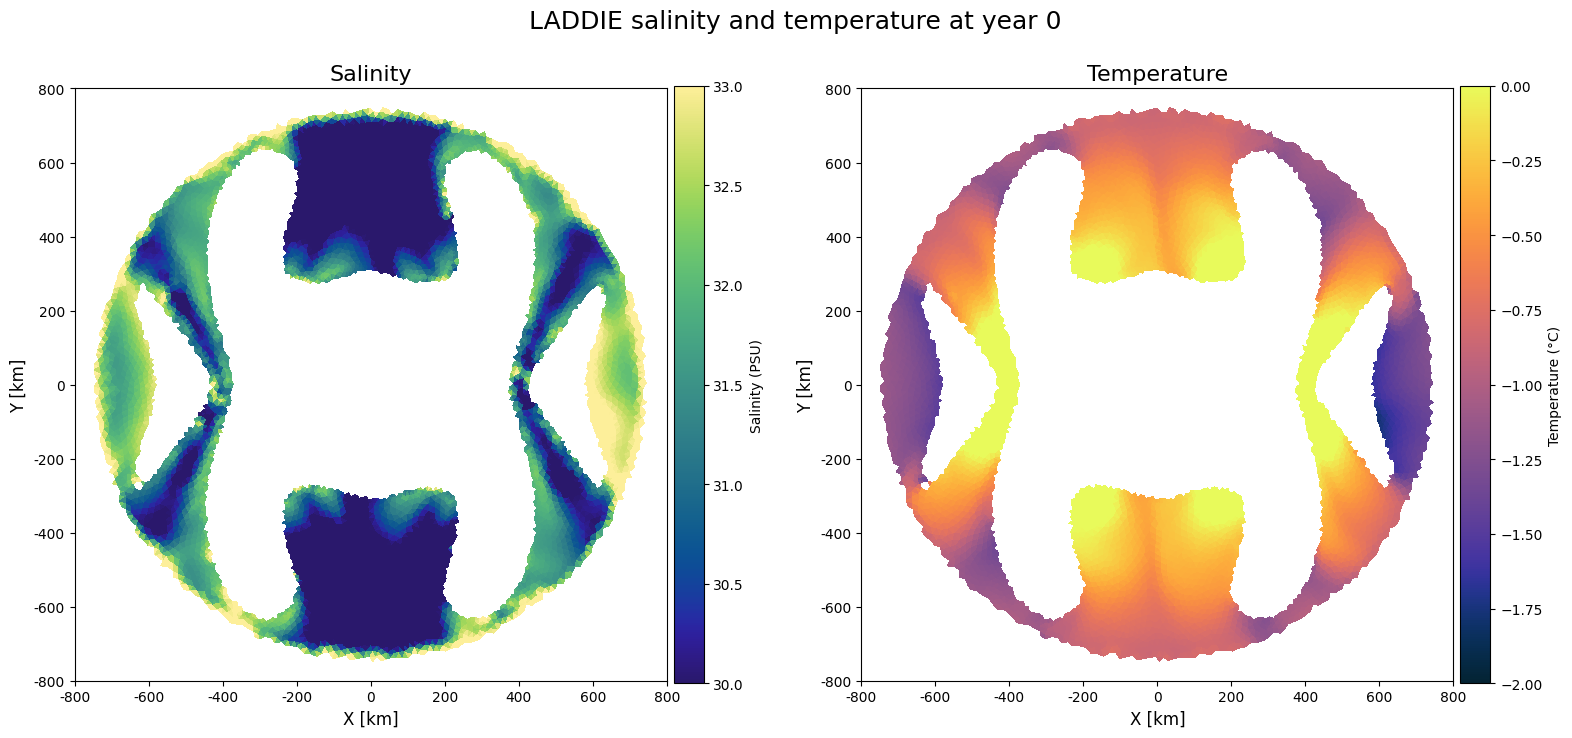

In [26]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.865, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'LADDIE salinity and temperature at year {u}', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, S_lad[u].where(mask_rock & mask_ocean), cmap=cmo.haline, vmin = 30 , vmax = 33)
fig.colorbar(c0, ax=ax[0], label="Salinity (PSU)", **colorbar_kwargs)
ax[0].set_title('Salinity', fontsize=14)
#cont1 = ax[0].tricontour(triang, S_lad[u], levels=[30,31,32,33,34], colors='r', linewidths=1)
#ax[0].clabel(cont1, inline=True, fontsize=8)

c1 = ax[1].tripcolor(triang, T_lad[u].where(mask_rock & mask_ocean), cmap=cmo.thermal, vmin = -2 , vmax = 0)
fig.colorbar(c1, ax=ax[1], label="Temperature (°C)", **colorbar_kwargs)
ax[1].set_title('Temperature', fontsize=14)
#cont2 = ax[1].tricontour(triang, T_lad[u], levels=[-1.5,-1,-0.5], colors='k', linewidths=1)
#ax[1].clabel(cont2, inline=True, fontsize=8)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/129092469.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


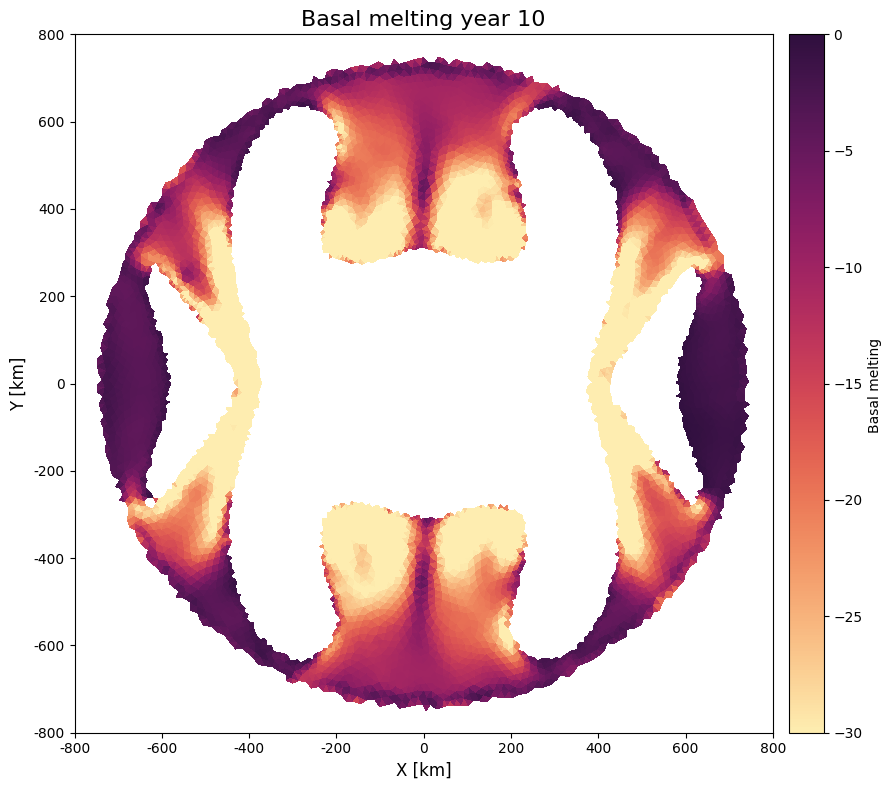

In [67]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 
 
c0 = ax.tripcolor(triang, BMB_l[0].where(mask_rock & mask_ocean) , cmap=cmo.matter , vmin = -30 , vmax = 0)
fig.colorbar(c0, ax=ax, label="Basal melting ", **colorbar_kwargs)
ax.set_title('Basal melting year 10', fontsize=14)

ax.set_aspect('equal')
ax.title.set_fontsize(16)
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
#ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)


plt.tight_layout()
plt.show()

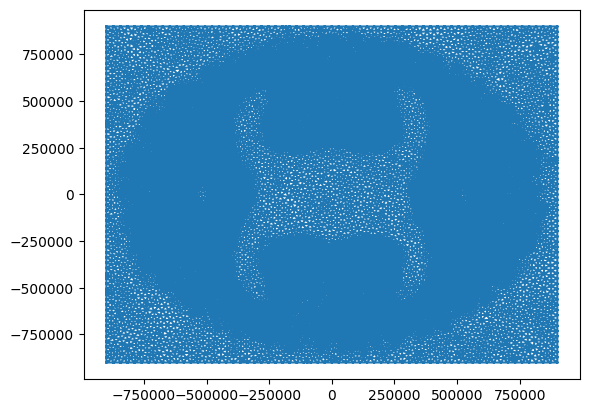

In [30]:
plt.triplot(triang)

Trigc  = Lad['TriGC']
TriGC = Trigc.T

triangGC = tri.Triangulation(TriGC[:, 0], TriGC[:, 1], Tri)

### year 10

In [31]:
u = 10

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/4147591235.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/4147591235.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


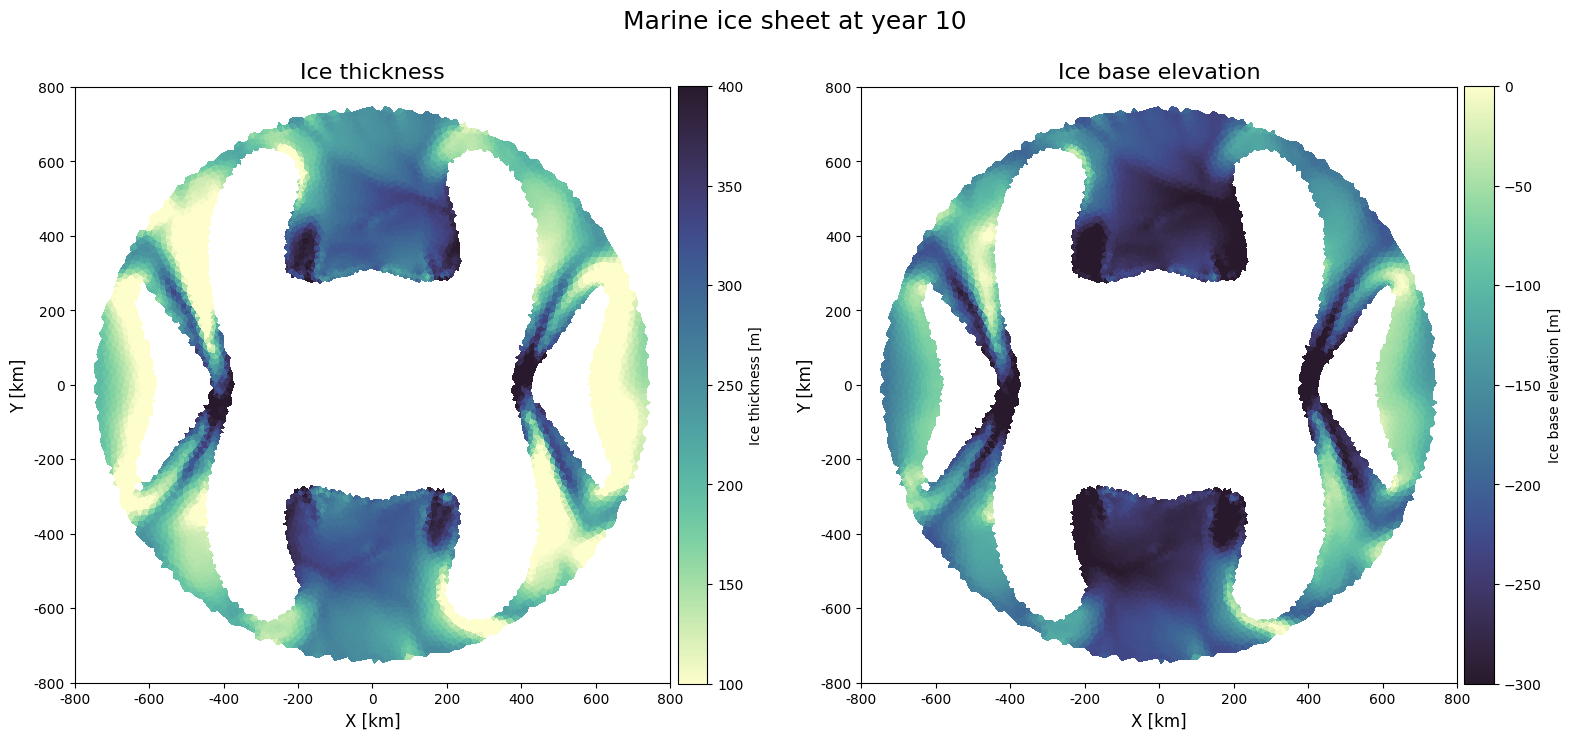

In [32]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.865, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'Marine ice sheet at year {u}', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, Hi_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep, vmin = 100, vmax = 400)
fig.colorbar(c0, ax=ax[0], label="Ice thickness [m]", **colorbar_kwargs)
ax[0].set_title('Ice thickness', fontsize=14)
#cont1 = ax[0].tricontour(triang, S_lad[u], levels=[30,31,32,33,34], colors='r', linewidths=1)
#ax[0].clabel(cont1, inline=True, fontsize=8)

c1 = ax[1].tripcolor(triang, Hs_l[u].where(mask_ocean & mask_rock) - Hi_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep_r, vmin = -300, vmax = 0)
fig.colorbar(c1, ax=ax[1], label="Ice base elevation [m]", **colorbar_kwargs)
ax[1].set_title('Ice base elevation', fontsize=14)
#cont2 = ax[1].tricontour(triang, T_lad[u], levels=[-1.5,-1,-0.5], colors='k', linewidths=1)
#ax[1].clabel(cont2, inline=True, fontsize=8)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/2550948274.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/2550948274.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


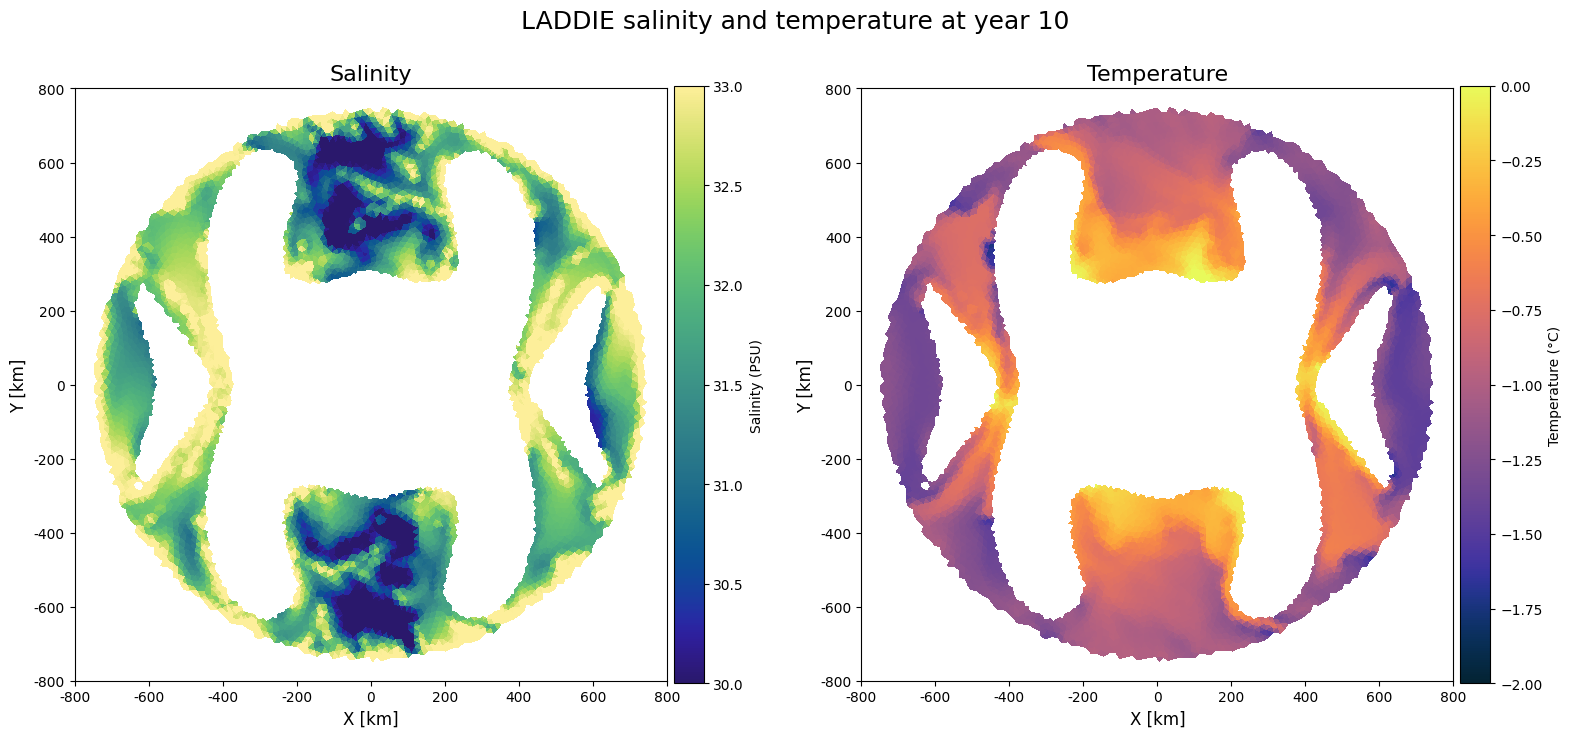

In [33]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.865, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'LADDIE salinity and temperature at year {u}', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, S_lad[u].where(mask_rock & mask_ocean), cmap=cmo.haline, vmin = 30 , vmax = 33)
fig.colorbar(c0, ax=ax[0], label="Salinity (PSU)", **colorbar_kwargs)
ax[0].set_title('Salinity', fontsize=14)
#cont1 = ax[0].tricontour(triang, S_lad[u], levels=[30,31,32,33,34], colors='r', linewidths=1)
#ax[0].clabel(cont1, inline=True, fontsize=8)

c1 = ax[1].tripcolor(triang, T_lad[u].where(mask_rock & mask_ocean), cmap=cmo.thermal, vmin = -2 , vmax = 0)
fig.colorbar(c1, ax=ax[1], label="Temperature (°C)", **colorbar_kwargs)
ax[1].set_title('Temperature', fontsize=14)
#cont2 = ax[1].tricontour(triang, T_lad[u], levels=[-1.5,-1,-0.5], colors='k', linewidths=1)
#ax[1].clabel(cont2, inline=True, fontsize=8)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/129092469.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


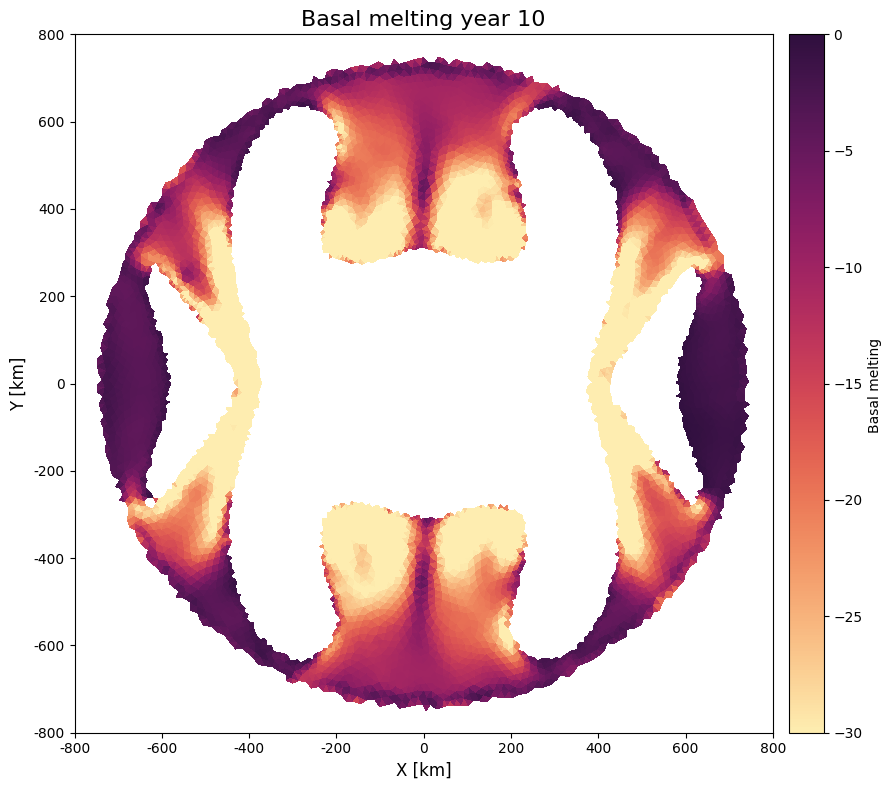

In [34]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 
 
c0 = ax.tripcolor(triang, BMB_l[0].where(mask_rock & mask_ocean) , cmap=cmo.matter , vmin = -30 , vmax = 0)
fig.colorbar(c0, ax=ax, label="Basal melting ", **colorbar_kwargs)
ax.set_title('Basal melting year 10', fontsize=14)

ax.set_aspect('equal')
ax.title.set_fontsize(16)
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
#ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)


plt.tight_layout()
plt.show()

### year 10 - year 0

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/716679176.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/716679176.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


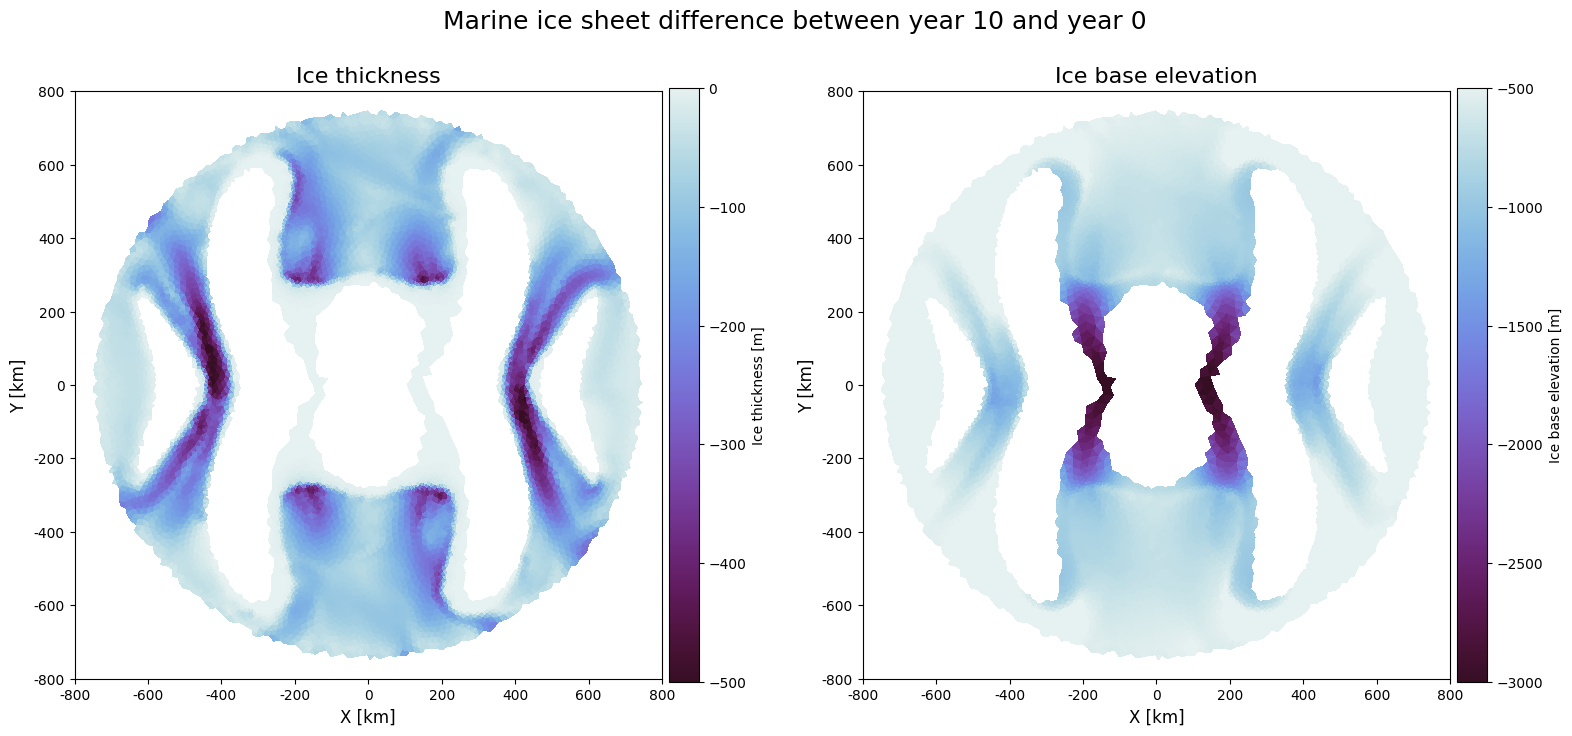

In [35]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.86, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'Marine ice sheet difference between year 10 and year 0', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, Hi_l[10].where(mask_SL & mask_ocean) -  Hi_l[0].where(mask_SL & mask_ocean), cmap=cmo.dense_r, vmin = -500, vmax = 0)
fig.colorbar(c0, ax=ax[0], label="Ice thickness [m]", **colorbar_kwargs)
ax[0].set_title('Ice thickness', fontsize=14)
#cont1 = ax[0].tricontour(triang, S_lad[u], levels=[30,31,32,33,34], colors='r', linewidths=1)
#ax[0].clabel(cont1, inline=True, fontsize=8)

c1 = ax[1].tripcolor(triang, Hs_l[10].where(mask_ocean & mask_SL) - Hi_l[10].where(mask_ocean & mask_SL) -  Hs_l[0].where(mask_ocean & mask_SL) - Hi_l[0].where(mask_ocean & mask_SL), cmap=cmo.dense_r,  vmin = -3000, vmax = -500)
fig.colorbar(c1, ax=ax[1], label="Ice base elevation [m]", **colorbar_kwargs)
ax[1].set_title('Ice base elevation', fontsize=14)
#cont2 = ax[1].tricontour(triang, T_lad[u], levels=[-1.5,-1,-0.5], colors='k', linewidths=1)
#ax[1].clabel(cont2, inline=True, fontsize=8)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/506718976.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_8911/506718976.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


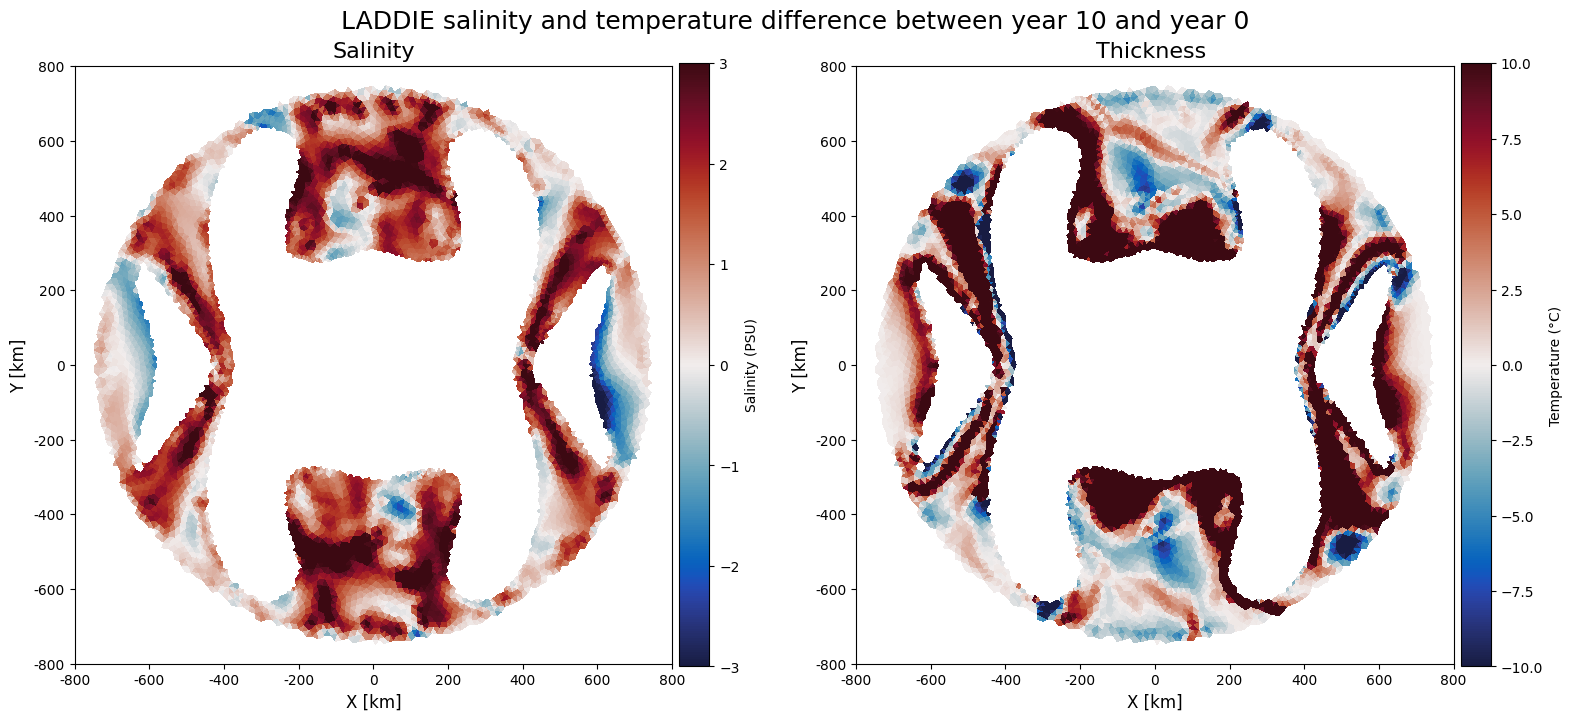

In [ ]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.825, 
}

##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'LADDIE salinity and temperature difference between year 10 and year 0', fontsize=18, x=0.5, y=0.92)
 
c0 = ax[0].tripcolor(triang, S_lad[10].where(mask_rock & mask_ocean)  -  S_lad[0].where(mask_rock & mask_ocean), cmap=cmo.balance , vmin = -3 , vmax = 3)
fig.colorbar(c0, ax=ax[0], label="Salinity (PSU)", **colorbar_kwargs)
ax[0].set_title('Salinity', fontsize=14)


c1 = ax[1].tripcolor(triang, H_lad[10].where(mask_rock & mask_ocean)  - H_lad[0].where(mask_rock & mask_ocean), cmap=cmo.balance , vmin = - 10 , vmax = 10)
fig.colorbar(c1, ax=ax[1], label="Temperature (°C)", **colorbar_kwargs)
ax[1].set_title('Thickness ', fontsize=14)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout()
plt.show()

### Other plots

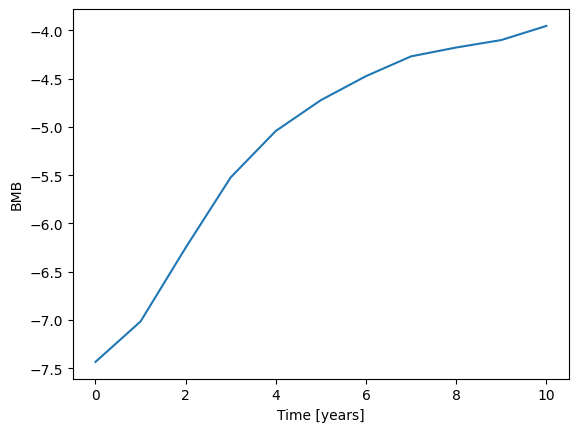

In [37]:
BMB_l.mean(axis=1).plot()

## Salinity problem

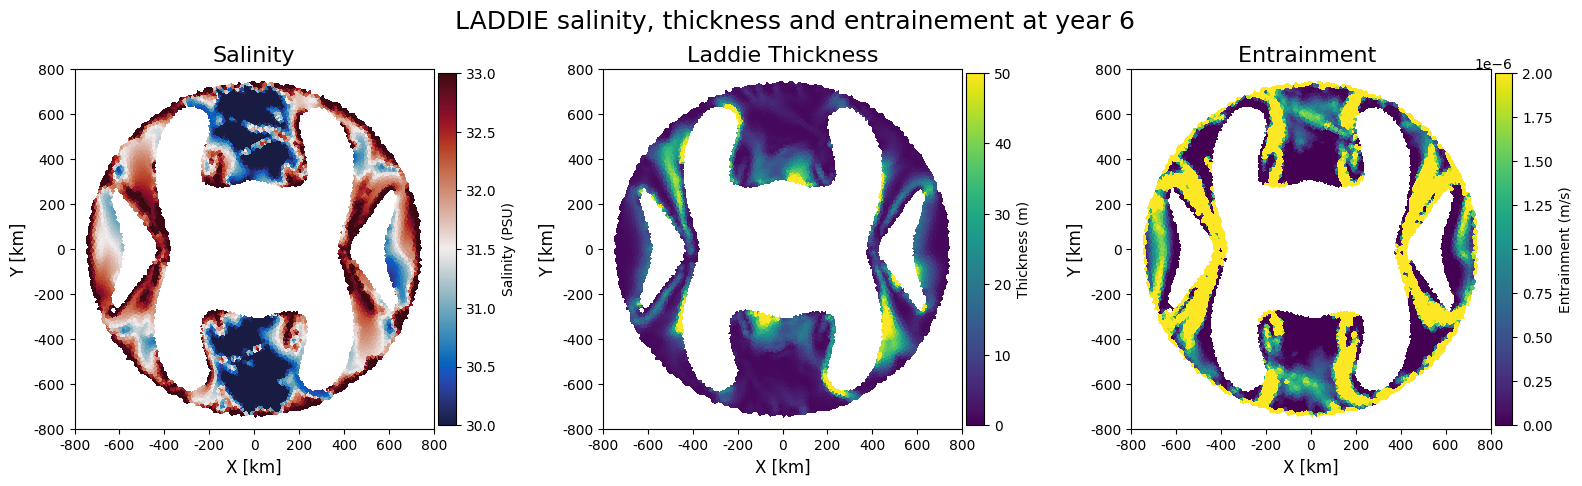

In [72]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.51, 
}

u = 6
fig, ax = plt.subplots(1, 3, figsize=(16, 8)) 
fig.suptitle(f'LADDIE salinity, thickness and entrainement at year {u}', fontsize=18, x=0.5, y=0.75)

c0 = ax[0].tripcolor(triang, S_lad[u].where(mask_rock & mask_ocean) , cmap=cmo.balance, vmin=30, vmax=33)
fig.colorbar(c0, ax=ax[0], label="Salinity (PSU)", **colorbar_kwargs)
ax[0].set_title('Salinity', fontsize=14)

c1 = ax[1].tripcolor(triang, H_lad[u].where(mask_rock & mask_ocean) , cmap='viridis', vmin = 0, vmax = 50)
fig.colorbar(c1, ax=ax[1], label="Thickness (m)", **colorbar_kwargs)
ax[1].set_title('Laddie Thickness', fontsize=14)

c2 = ax[2].tripcolor(triang, E[u].where(mask_rock & mask_ocean), cmap='viridis' , vmin=0, vmax=0.000002)
fig.colorbar(c2, ax=ax[2], label="Entrainment (m/s)", **colorbar_kwargs)
ax[2].set_title('Entrainment ', fontsize=14)

for j in range(3):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    ax[j].set_xticks(np.arange(-n, n + 1, 200000))
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

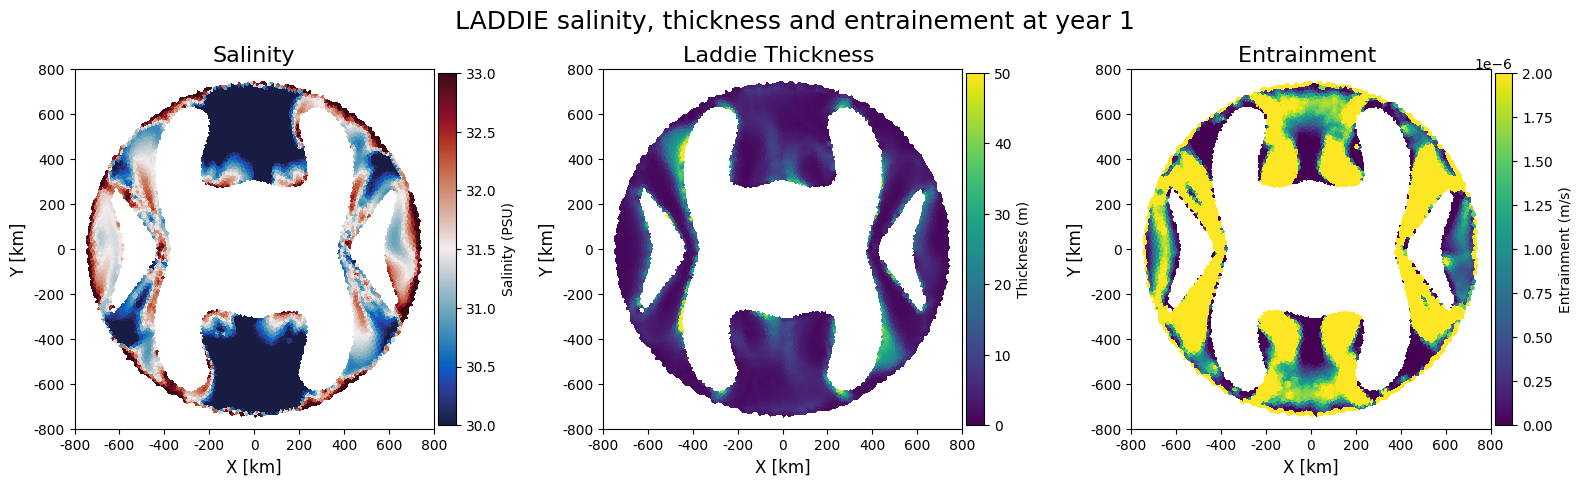

In [68]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.51, 
}

u = 1
fig, ax = plt.subplots(1, 3, figsize=(16, 8)) 
fig.suptitle(f'LADDIE salinity, thickness and entrainement at year {u}', fontsize=18, x=0.5, y=0.75)

c0 = ax[0].tripcolor(triang, S_lad[u].where(mask_rock & mask_ocean) , cmap=cmo.balance, vmin=30, vmax=33)
fig.colorbar(c0, ax=ax[0], label="Salinity (PSU)", **colorbar_kwargs)
ax[0].set_title('Salinity', fontsize=14)

c1 = ax[1].tripcolor(triang, H_lad[u].where(mask_rock & mask_ocean) , cmap='viridis', vmin = 0, vmax = 50)
fig.colorbar(c1, ax=ax[1], label="Thickness (m)", **colorbar_kwargs)
ax[1].set_title('Laddie Thickness ', fontsize=14)

c2 = ax[2].tripcolor(triang, E[u].where(mask_rock & mask_ocean), cmap='viridis' , vmin=0, vmax=0.000002)
fig.colorbar(c2, ax=ax[2], label="Entrainment (m/s)", **colorbar_kwargs)
ax[2].set_title('Entrainment ', fontsize=14)

for j in range(3):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    ax[j].set_xticks(np.arange(-n, n + 1, 200000))
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

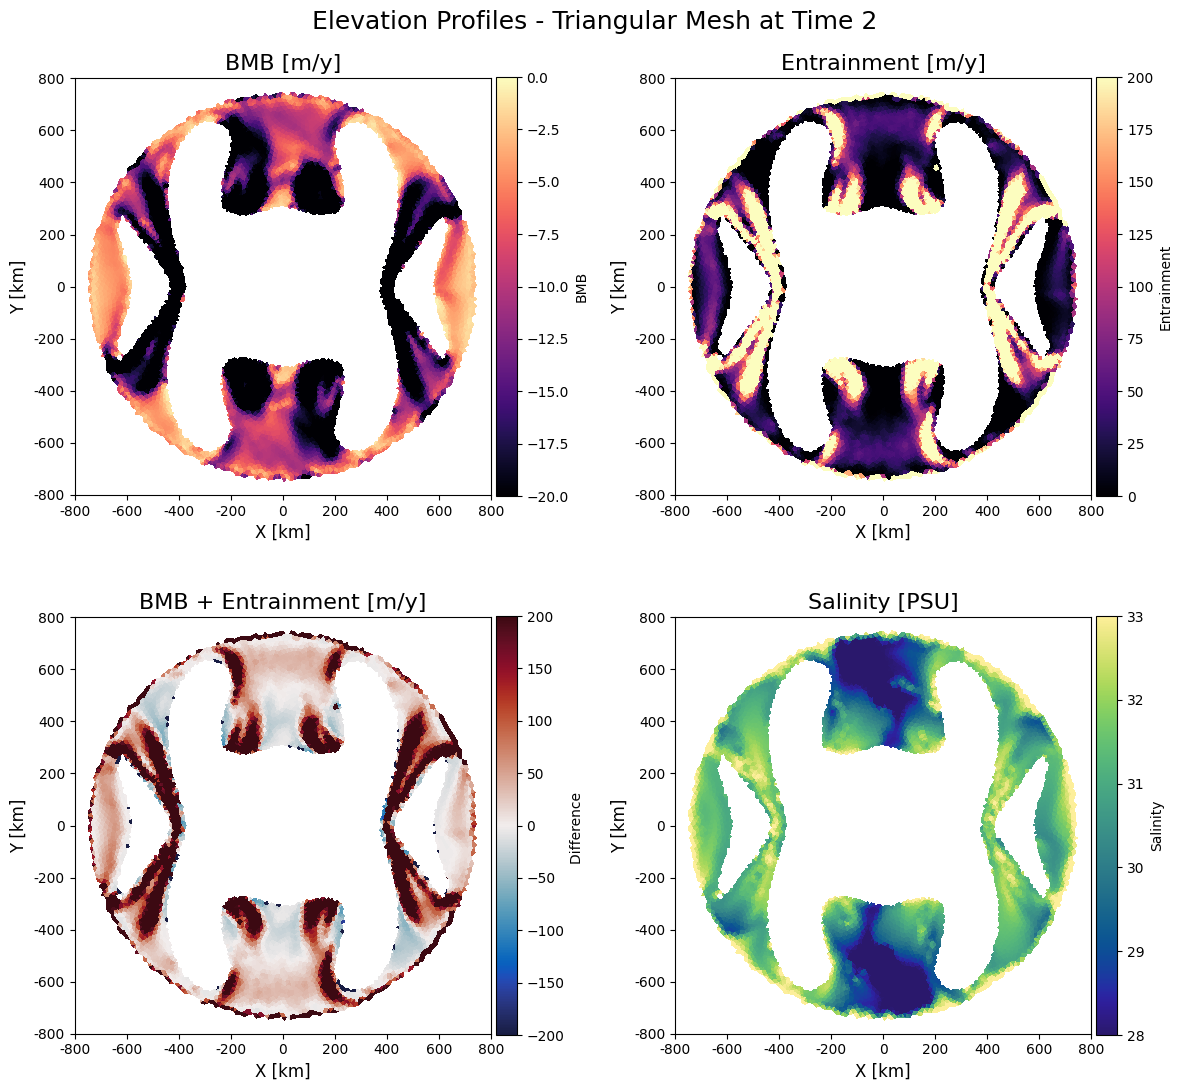

In [ ]:
n = 800000

colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.81, 
}

u = 2
##############################################################################################################################

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f'Water transport at Time {u}', fontsize=18, x=0.5, y=0.92)


c0 = ax[0, 0].tripcolor(triang, BMB_l[u].where(mask_ocean & mask_rock), cmap="magma", vmin = -20 , vmax = 0)
fig.colorbar(c0, ax=ax[0, 0], label="BMB", **colorbar_kwargs)
ax[0, 0].set_title('BMB [m/y]', fontsize=14)

c1 = ax[0, 1].tripcolor(triang, E[u].where(mask_ocean & mask_rock)*24*3600*365, cmap="magma", vmin = 0, vmax=200)
fig.colorbar(c1, ax=ax[0, 1], label="Entrainment", **colorbar_kwargs)
ax[0, 1].set_title('Entrainment [m/y]', fontsize=14)


c2 = ax[1, 0].tripcolor(triang, BMB_l[u].where(mask_ocean & mask_rock) +  E[u].where(mask_ocean & mask_rock)*24*3600*365, cmap=cmo.balance, vmin=-200, vmax=200)
fig.colorbar(c2, ax=ax[1, 0], label="Difference ", **colorbar_kwargs)
ax[1, 0].set_title('BMB + Entrainment [m/y]', fontsize=14)


c3 = ax[1, 1].tripcolor(triang, S_lad[u].where(mask_ocean & mask_rock), cmap=cmo.haline , vmin =28, vmax=33)
fig.colorbar(c3, ax=ax[1, 1], label="Salinity", **colorbar_kwargs)
ax[1, 1].set_title('Salinity [PSU]', fontsize=14)

 

for i in range(2):
    for j in range(2):
        ax[i, j].set_aspect('equal')
        ax[i, j].title.set_fontsize(16)
        ax[i, j].set_xlabel('X [km]', fontsize=12)
        ax[i, j].set_ylabel('Y [km]', fontsize=12)
        ax[i, j].set_xticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_yticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_xlim(-n,n)
        ax[i, j].set_ylim(-n,n)
 


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




## Grid  

In [23]:
x = Lad_g['x']
y = Lad_g['y']

X,Y = np.meshgrid(x,y)

In [24]:
u = Lad_g['U_lad']
v = Lad_g['V_lad']


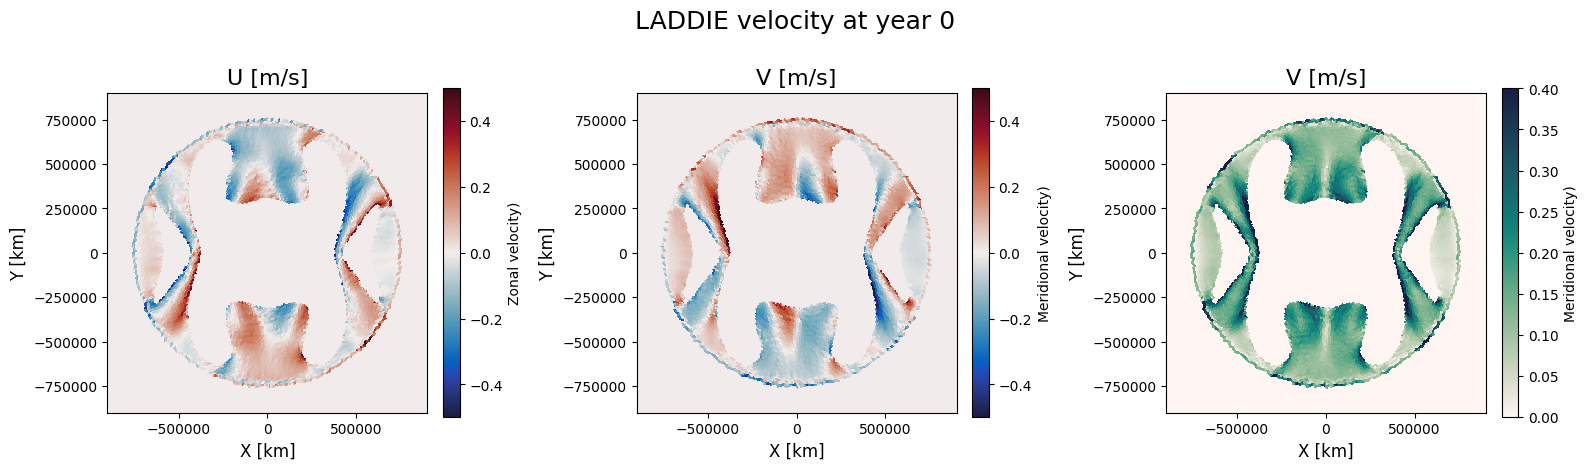

In [25]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.04,
    'shrink': 0.45, 
}


fig, ax = plt.subplots(1, 3, figsize=(16, 8)) 
fig.suptitle(f'LADDIE velocity at year 0', fontsize=18, x=0.5, y = 0.78)

c0 = ax[0].pcolormesh(x,y,u[0], cmap=cmo.balance , vmin = -0.5 , vmax = 0.5)
fig.colorbar(c0, ax=ax[0], label="Zonal velocity)", **colorbar_kwargs)
ax[0].set_title('U [m/s]', fontsize=14)

c1 = ax[1].pcolormesh(x,y,v[0], cmap=cmo.balance , vmin = -0.5 , vmax = 0.5)
fig.colorbar(c1, ax=ax[1], label="Meridional velocity)", **colorbar_kwargs)
ax[1].set_title('V [m/s]', fontsize=14)

c2 = ax[2].pcolormesh(x,y,np.sqrt(u[0]**2 + v[0]**2), cmap=cmo.tempo , vmin = 0 , vmax = 0.4)
fig.colorbar(c2, ax=ax[2], label="Meridional velocity)", **colorbar_kwargs)
ax[2].set_title('V [m/s]', fontsize=14)


for j in range(3):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].set_xlim(100, 900)
    #ax[j].set_ylim(100, 900)
plt.tight_layout()
plt.show()

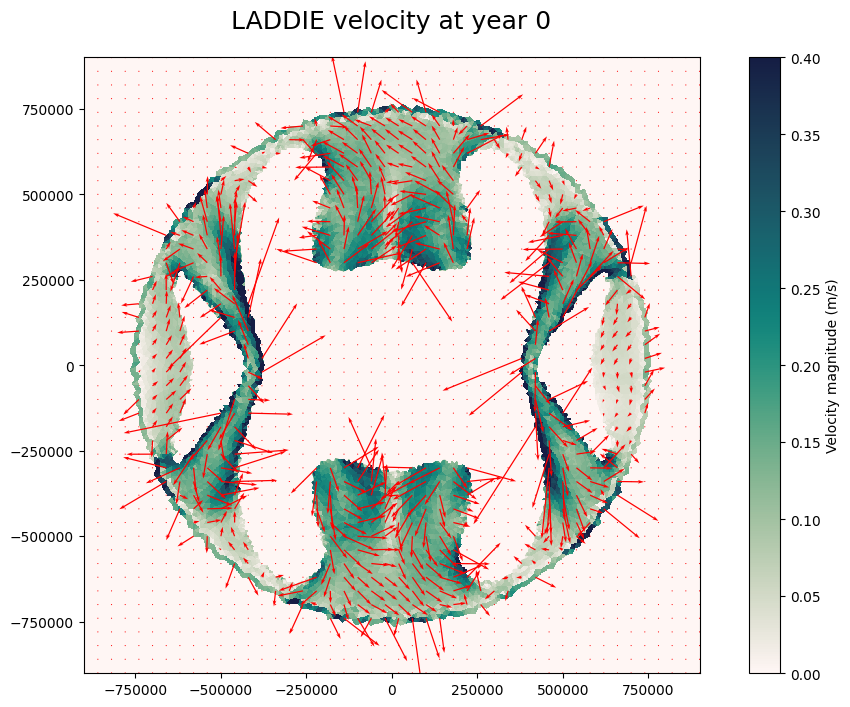

In [26]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.04,
    'shrink': 1, 
}
n = 20

fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 
fig.suptitle(f'LADDIE velocity at year 0', fontsize=18, x=0.56, y=0.94)
ax.set_aspect('equal')

# Plot the velocity magnitude
c0 = ax.pcolormesh(x,y,np.sqrt(u[0]**2 + v[0]**2), cmap=cmo.tempo, vmin=0, vmax=0.4)

# Add quivers
plt.quiver(X[::n, ::n], Y[::n, ::n], u[0][::n, ::n], v[0][::n, ::n], color='red',scale = 4, width=0.002, headwidth=3, headlength=5, headaxislength=4)

# Add colorbar
fig.colorbar(c0, ax=ax, label="Velocity magnitude (m/s)", **colorbar_kwargs)

# Optional: Set limits if needed
# ax.set_xlim(100, 900)
# ax.set_ylim(100, 900)

plt.show()


### MISMIPplus

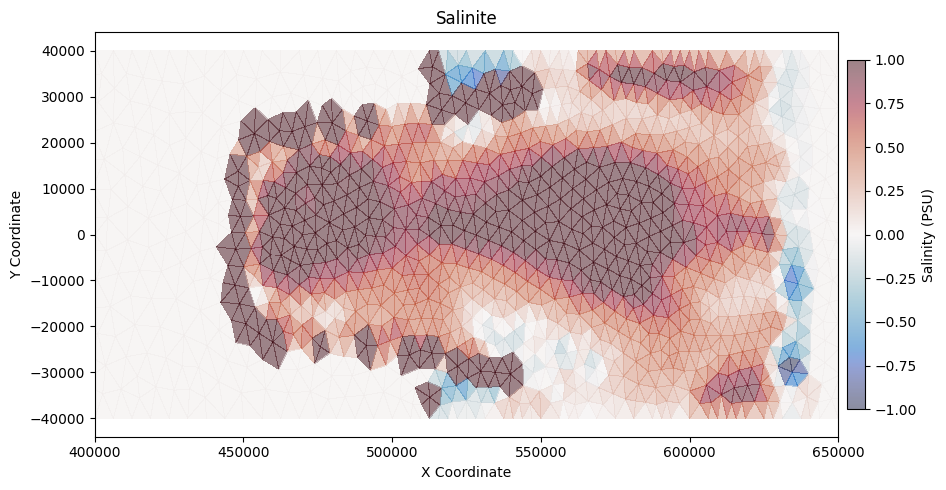

In [135]:
fig, ax = plt.subplots(figsize=(10, 5))
c = ax.tripcolor(triang_, S_MIS[10] - S_MIS[0], cmap=cmo.balance, alpha=0.5, vmin = -1, vmax = 1 ) # Plot all triangles in light grey
fig.colorbar(c, ax=ax, label="Salinity (PSU)", **colorbar_kwargs)
ax.set_title('Salinite')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_xlim(400000, 650000)

plt.tight_layout()
plt.show()